In [1]:
import pandas as pd

In [5]:
population = pd.read_csv('data/colombia/population_2005.csv',sep='\t')

In [16]:
cols = ['TOTAL_2005','CABECERA_2005', 'RESTO_2005']
for col in cols:
    population[col] = population[col].apply(lambda x: float(x.replace(',', '')))

In [19]:
(population.CABECERA_2005+population.RESTO_2005 == population.TOTAL_2005).mean()

1.0

In [20]:
population['CABECERA_pcnt'] = population.CABECERA_2005/population.TOTAL_2005

In [23]:
population.sort_values('TOTAL_2005', ascending=False, inplace=True)

In [24]:
population['pop_order'] = pd.np.arange(population.shape[0])+1

In [71]:
population[['DPNOM', 'MPIO', 'TOTAL_2005', 'CABECERA_pcnt','pop_order']].set_index('pop_order')

,DPNOM,MPIO,TOTAL_2005,CABECERA_pcnt
pop_order,,,,
1,"Bogotá, D.C.","Bogotá, D.C.",6840116.0,0.997718
2,Antioquia,Medellín,2214494.0,0.982473
3,Valle del Cauca,Cali,2119908.0,0.982670
4,Atlántico,Barranquilla,1146359.0,0.996470
5,Bolívar,Cartagena,892545.0,0.943625
6,Norte de Santander,Cúcuta,587676.0,0.965947
7,Santander,Bucaramanga,516512.0,0.985874
8,Tolima,Ibagué,498401.0,0.940301
9,Atlántico,Soledad,461851.0,0.998149


In [62]:
res = []
for thres in [0.8, 0.85, 0.9, 0.95, 0.99]:
    sub = population[population.CABECERA_pcnt>=thres]
    stats = {'pcnt_thres': thres}
    for top in range(10, 1000, 10):
#         print(top)
        stats[top] = sub[sub.pop_order<=top].shape[0]/top
        
    res.append(stats)
res = pd.DataFrame(res)
res.set_index('pcnt_thres', inplace=True)

In [58]:
%matplotlib inline

In [66]:
res

,10,20,30,40,50,60,70,80,90,100,...,900,910,920,930,940,950,960,970,980,990
pcnt_thres,,,,,,,,,,,,,,,,,,,,,
0.80,1.0,0.95,0.966667,0.875,0.80,0.766667,0.700000,0.6500,0.644444,0.61,...,0.114444,0.113187,0.111957,0.110753,0.109574,0.108421,0.107292,0.106186,0.105102,0.104040
0.85,0.9,0.80,0.833333,0.725,0.66,0.633333,0.557143,0.5125,0.522222,0.49,...,0.082222,0.081319,0.080435,0.079570,0.078723,0.077895,0.077083,0.076289,0.075510,0.074747
0.90,0.9,0.75,0.700000,0.575,0.46,0.416667,0.357143,0.3250,0.333333,0.30,...,0.046667,0.046154,0.045652,0.045161,0.044681,0.044211,0.043750,0.043299,0.042857,0.042424
0.95,0.7,0.45,0.400000,0.350,0.28,0.250000,0.214286,0.2000,0.188889,0.17,...,0.024444,0.024176,0.023913,0.023656,0.023404,0.023158,0.022917,0.022680,0.022449,0.022222
0.99,0.3,0.15,0.100000,0.075,0.06,0.050000,0.042857,0.0375,0.033333,0.03,...,0.003333,0.003297,0.003261,0.003226,0.003191,0.003158,0.003125,0.003093,0.003061,0.003030


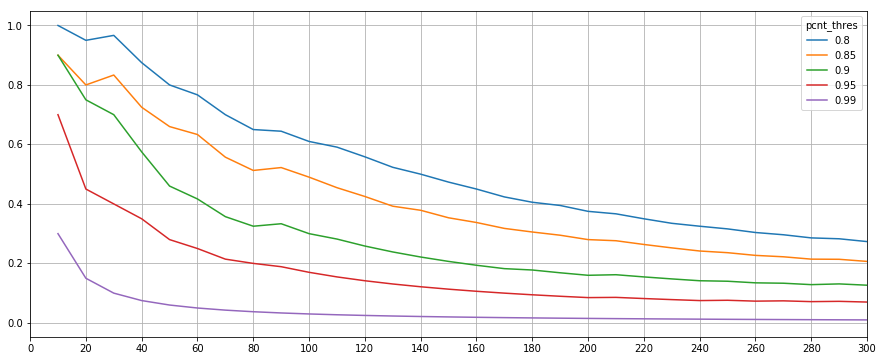

In [65]:
res.T.plot(figsize=(15,6), xticks=range(0, 301, 20),xlim=(0,300), grid=True)